In [136]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [137]:
import numpy as np
import pandas as pd

In [138]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [139]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [140]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [141]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)


In [142]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [143]:
# Save references to each table
measurement = Base.classes.measurement
station = Base.classes.station

In [144]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [145]:
from sqlalchemy import inspect
inspector = inspect(engine)
columns = inspector.get_columns('measurement')
for column in columns:
    print(column["name"], column["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [32]:
from sqlalchemy import inspect
inspector = inspect(engine)
columns = inspector.get_columns('station')
for column in columns:
    print(column["name"], column["type"])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [ ]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results

# Calculate the date 1 year ago from the last data point in the database

# Perform a query to retrieve the data and precipitation scores

# Save the query results as a Pandas DataFrame and set the index to the date column

# Sort the dataframe by date

# Use Pandas Plotting with Matplotlib to plot the data

In [146]:
last_date = session.query(measurement.date).order_by(measurement.date.desc()).first()
last_date

('2017-08-23')

In [152]:
year_date = dt.date(2017, 8, 23) - dt.timedelta(days=365)
print(year_date)
year_date

2016-08-23


datetime.date(2016, 8, 23)

In [153]:
year_data = session.query(measurement.date, measurement.prcp).filter(measurement.date >= year_date).all()
for x in year_data:
    print(x)

('2016-08-23', 0.0)
('2016-08-24', 0.08)
('2016-08-25', 0.08)
('2016-08-26', 0.0)
('2016-08-27', 0.0)
('2016-08-28', 0.01)
('2016-08-29', 0.0)
('2016-08-30', 0.0)
('2016-08-31', 0.13)
('2016-09-01', 0.0)
('2016-09-02', 0.0)
('2016-09-03', 0.0)
('2016-09-04', 0.03)
('2016-09-05', None)
('2016-09-06', None)
('2016-09-07', 0.05)
('2016-09-08', 0.0)
('2016-09-09', 0.03)
('2016-09-10', 0.0)
('2016-09-11', 0.05)
('2016-09-12', 0.0)
('2016-09-13', 0.02)
('2016-09-14', 1.32)
('2016-09-15', 0.42)
('2016-09-16', 0.06)
('2016-09-17', 0.05)
('2016-09-18', 0.0)
('2016-09-19', 0.0)
('2016-09-20', 0.0)
('2016-09-21', 0.0)
('2016-09-22', 0.02)
('2016-09-23', 0.0)
('2016-09-24', 0.0)
('2016-09-25', 0.0)
('2016-09-26', 0.06)
('2016-09-27', 0.02)
('2016-09-28', 0.0)
('2016-09-29', 0.0)
('2016-09-30', 0.0)
('2016-10-01', 0.0)
('2016-10-02', 0.0)
('2016-10-03', 0.0)
('2016-10-04', 0.0)
('2016-10-05', 0.0)
('2016-10-06', 0.0)
('2016-10-07', 0.0)
('2016-10-08', 0.0)
('2016-10-09', 0.0)
('2016-10-10', 0.0)
('

('2016-09-01', 0.02)
('2016-09-02', 0.01)
('2016-09-03', 0.12)
('2016-09-04', 0.14)
('2016-09-05', 0.03)
('2016-09-06', 0.11)
('2016-09-07', 0.16)
('2016-09-08', 0.07)
('2016-09-09', 0.16)
('2016-09-10', 0.09)
('2016-09-11', 0.3)
('2016-09-12', 0.31)
('2016-09-13', 0.34)
('2016-09-14', 2.33)
('2016-09-15', 0.83)
('2016-09-16', 0.06)
('2016-09-17', 0.36)
('2016-09-18', 0.07)
('2016-09-19', 0.01)
('2016-09-20', 0.22)
('2016-09-21', 0.07)
('2016-09-22', 0.34)
('2016-09-23', 0.94)
('2016-09-24', 0.01)
('2016-09-25', 0.03)
('2016-09-26', 0.17)
('2016-09-27', 0.17)
('2016-09-28', 0.0)
('2016-09-29', 0.59)
('2016-09-30', 0.25)
('2016-10-01', 0.14)
('2016-10-02', 0.06)
('2016-10-03', 0.16)
('2016-10-04', 0.03)
('2016-10-05', 0.01)
('2016-10-06', 0.0)
('2016-10-07', 0.0)
('2016-10-08', 0.0)
('2016-10-09', 0.0)
('2016-10-10', 0.0)
('2016-10-11', 0.28)
('2016-10-12', 0.03)
('2016-10-13', 0.0)
('2016-10-14', 0.0)
('2016-10-15', 0.04)
('2016-10-16', 0.0)
('2016-10-17', 0.01)
('2016-10-18', 0.02)
('

In [156]:
df = pd.DataFrame(year_data, columns = ['Date', 'Precipitation'])
df = df.sort_values('Date')
df.head()

,Date,Precipitation
0,2016-08-23,0.00
1009,2016-08-23,NaN
1529,2016-08-23,1.79
704,2016-08-23,0.05
361,2016-08-23,0.15


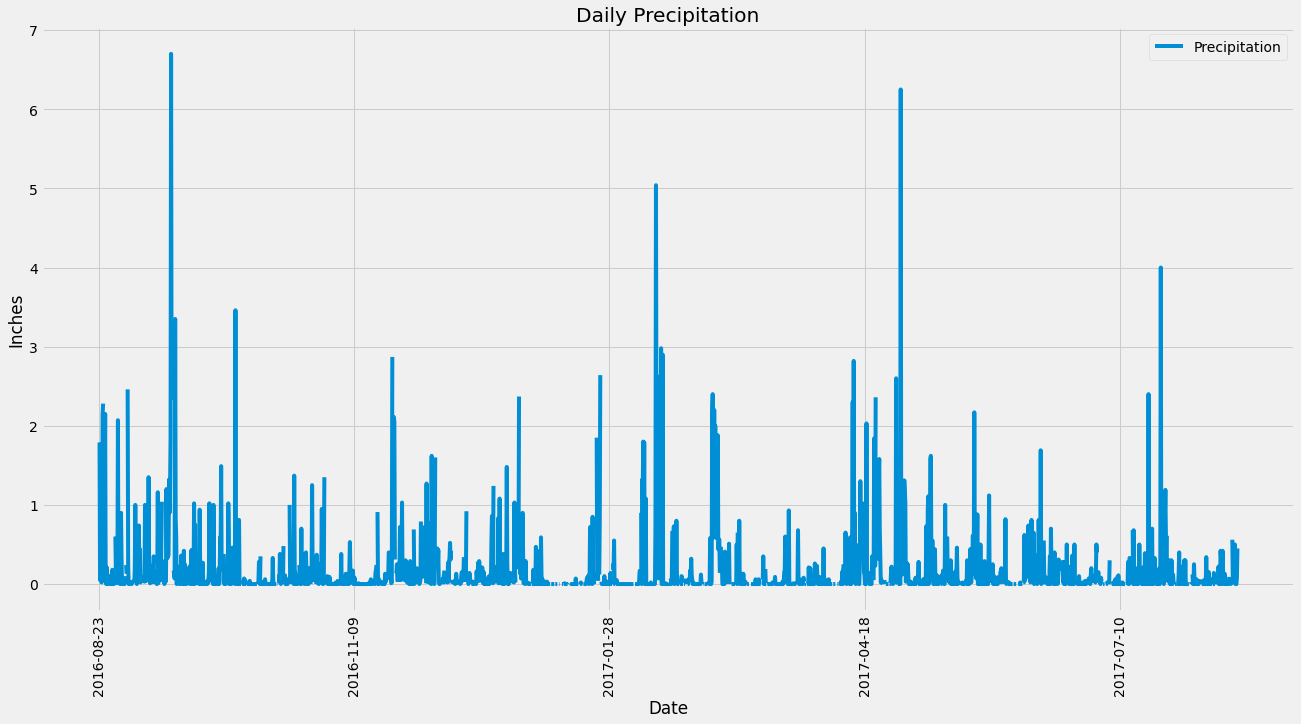

In [159]:
df.plot(x="Date", y="Precipitation", rot=90, figsize=(20,10))
# plt.tight_layout()
plt.xlabel('Date')
plt.ylabel('Inches')
plt.title('Daily Precipitation')
plt.show()

# Exploratory Climate Analysis

In [71]:
# Use Pandas to calcualte the summary statistics for the precipitation data

df.describe()

,Precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [160]:
# Design a query to show how many stations are available in this dataset?
session.query(func.count(station.id)).all()

[(9)]

In [203]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.

activity = session.query(measurement.station, func.count(measurement.station)).group_by(measurement.station).order_by(func.count(measurement.station).desc()).all()
activity

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [161]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?
session.query(func.min(measurement.tobs), func.max(measurement.tobs), func.avg(measurement.tobs)).filter(measurement.station=='USC00519281').all()

[(54.0, 85.0, 71.66378066378067)]

In [162]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
active_year=session.query(measurement.station, func.count(measurement.tobs)).group_by(measurement.station).order_by(func.count(measurement.tobs).desc()).all()
active_year

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [163]:
year_temps = session.query(measurement.tobs).filter(measurement.station == 'USC00519281', measurement.date >= year_date).all()


In [164]:
temp_df = pd.DataFrame(year_temps, columns = ['temperature'])


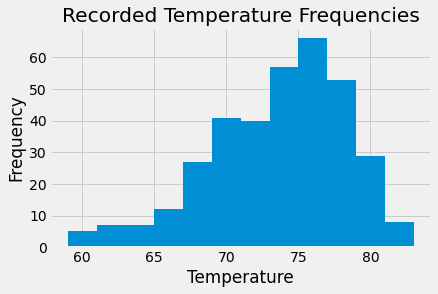

In [166]:
temp_df.hist(column='temperature', bins=12)
plt.tight_layout()
plt.title('Recorded Temperature Frequencies')
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.show()

In [202]:
session.close()

## Bonus Challenge Assignment

In [30]:
from scipy import stats
from scipy import mean

In [165]:
date_str = "06"
june_avg_temp = session.query(func.avg(measurement.tobs)).\
    filter(func.strftime("%m", measurement.date) == date_str).all()


june_temps = session.query(measurement.tobs).\
    filter(func.strftime("%m", measurement.date) == date_str).all()

In [167]:
date_str2 = "12"
dec_avg_temp = session.query(func.avg(measurement.tobs)).\
    filter(func.strftime("%m", measurement.date) == date_str2).all()
dec_temps = session.query(measurement.tobs).\
    filter(func.strftime("%m", measurement.date) == date_str2).all()

In [166]:
june_avg_temp

[(74.94411764705882)]

In [168]:
dec_avg_temp

[(71.04152933421226)]

In [33]:
#unpaired t test due to being independent groups of temperatures. they are not related.
#The difference in means here is not significant

stats.ttest_ind(june_temps, dec_temps)

Ttest_indResult(statistic=array([31.60372399]), pvalue=array([3.9025129e-191]))

In [44]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(measurement.tobs), func.avg(measurement.tobs), func.max(measurement.tobs)).\
        filter(measurement.date >= start_date).filter(measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [200]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.
my_temps = calc_temps('2012-06-20', '2012-06-27')
my_temps
xmin, xavg, xmax = my_temps[0]
xmin, xavg, xmax

(68.0, 73.04918032786885, 81.0)

In [201]:
t_error = xmax-xmin
t_error

13.0

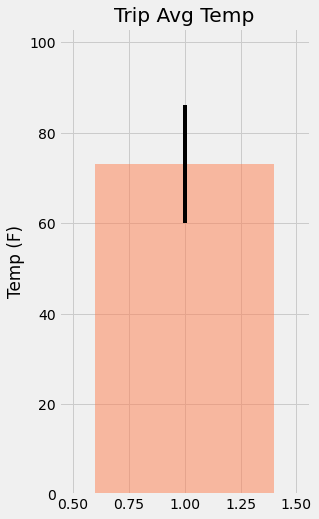

In [206]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)
fig, ax = plt.subplots(figsize=plt.figaspect(2.))
ax.bar(1, xavg, yerr = t_error, color="coral", alpha=.5)
ax.margins(.2, .2)
ax.set_ylabel("Temp (F)")
ax.set_title("Trip Avg Temp")
plt.show()

In [171]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation

session.query(func.sum(measurement.prcp), station.station, station.name, station.latitude, station.longitude, station.elevation).filter(measurement.date >= '2012-06-20').filter(measurement.station==station.station).filter(measurement.date <= '2012-06-27').group_by(station.station).order_by(func.sum(measurement.prcp).desc()).all()

[(6.789999999999999,
  'USC00516128',
  'MANOA LYON ARBO 785.2, HI US',
  21.3331,
  -157.8025,
  152.4),
 (1.8900000000000001,
  'USC00519281',
  'WAIHEE 837.5, HI US',
  21.45167,
  -157.84888999999998,
  32.9),
 (1.2100000000000002,
  'USC00513117',
  'KANEOHE 838.1, HI US',
  21.4234,
  -157.8015,
  14.6),
 (1.2,
  'USC00519523',
  'WAIMANALO EXPERIMENTAL FARM, HI US',
  21.33556,
  -157.71139,
  19.5),
 (0.44,
  'USC00514830',
  'KUALOA RANCH HEADQUARTERS 886.9, HI US',
  21.5213,
  -157.8374,
  7.0),
 (0.19, 'USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0),
 (0.14,
  'USC00511918',
  'HONOLULU OBSERVATORY 702.2, HI US',
  21.3152,
  -157.9992,
  0.9),
 (0.05, 'USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9),
 (None,
  'USC00518838',
  'UPPER WAHIAWA 874.3, HI US',
  21.4992,
  -158.0111,
  306.6)]

In [118]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(measurement.tobs), func.avg(measurement.tobs), func.max(measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", measurement.date) == date).all()
    
daily_normals("01-01")

[(62.0, 69.15384615384616, 77.0)]

In [172]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date

d1 = dt.date(2012,6,20)
d2 = dt.date(2012,6,27)

# this will give you a list containing all of the dates
date_range = [d1 + dt.timedelta(days=x) for x in range((d2-d1).days + 1)]
date_range

[datetime.date(2012, 6, 20),
 datetime.date(2012, 6, 21),
 datetime.date(2012, 6, 22),
 datetime.date(2012, 6, 23),
 datetime.date(2012, 6, 24),
 datetime.date(2012, 6, 25),
 datetime.date(2012, 6, 26),
 datetime.date(2012, 6, 27)]

In [173]:
my_dates = []
for x in date_range:
    my_dates.append(x.strftime('%m-%d'))
my_dates

['06-20', '06-21', '06-22', '06-23', '06-24', '06-25', '06-26', '06-27']

In [133]:
my_normals = []
for x in my_dates:
    my_normals.append(daily_normals(x))
my_normals

[[(68.0, 73.96491228070175, 85.0)],
 [(68.0, 74.75862068965517, 82.0)],
 [(69.0, 75.15789473684211, 81.0)],
 [(68.0, 74.54385964912281, 80.0)],
 [(68.0, 74.96428571428571, 84.0)],
 [(68.0, 74.10344827586206, 80.0)],
 [(67.0, 74.21428571428571, 82.0)],
 [(66.0, 75.01785714285714, 81.0)]]

In [134]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index
norms_df = pd.DataFrame(np.array(my_normals).reshape(len(my_normals),3), columns = ['tmin', 'tavg', 'tmax'], index = my_dates)
norms_df

,tmin,tavg,tmax
06-20,68.0,73.964912,85.0
06-21,68.0,74.758621,82.0
06-22,69.0,75.157895,81.0
06-23,68.0,74.543860,80.0
06-24,68.0,74.964286,84.0
06-25,68.0,74.103448,80.0
06-26,67.0,74.214286,82.0
06-27,66.0,75.017857,81.0


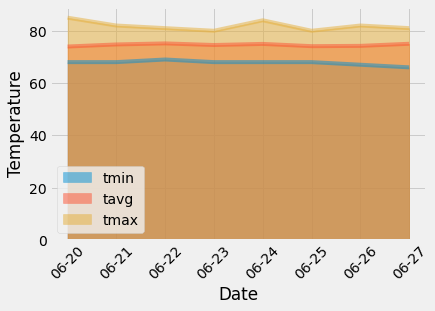

In [176]:
# Plot the daily normals as an area plot with `stacked=False`
norms_df.plot.area(stacked=False, rot=45)
plt.ylabel('Temperature')
plt.xlabel('Date')
plt.show()

In [ ]:
session.close()